## Auto.ru prediction model

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('autoru_cleaned.csv', sep=';')
df = df.drop(['title', 'model'], axis=1)

In [4]:
cat_columns = df.columns[df.dtypes == object].tolist()
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[cat_columns]).toarray())
df_2 = df.drop(cat_columns, axis=1)
df_2 = df_2.join(enc_df)

In [5]:
X = df_2.drop('price', axis=1)
y = df_2['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
model = RandomForestRegressor()

parameters_for_testing = {
   'max_depth':range(1, 10),
   'n_estimators':range(100, 500, 100),
   'min_samples_split': [5],
   'max_depth': [6],
   }

In [8]:
gsearch = GridSearchCV(estimator=model, param_grid=parameters_for_testing, n_jobs=-1, verbose=10)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   38.9s remaining:   58.4s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  1.3min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  1.6min remaining:   40.5s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  2.1min remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [9]:
print('Best params: {}'.format(gsearch.best_params_))
print('Best score: {}'.format(gsearch.best_score_))

Best params: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.6724963170762768


In [10]:
y_pred = gsearch.best_estimator_.predict(X_test)
print(r2_score(y_test, y_pred))

0.6879787273388236


<AxesSubplot:ylabel='price'>

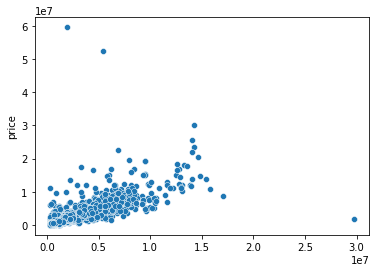

In [47]:
sns.scatterplot(x=y_pred, y=y_test)

In [15]:
df_valid = pd.DataFrame.from_dict({'brand': ['mitsubishi'], 
    'gear': ['автомат'], 
    'drive': ['передний'], 
    'color': ['красный'], 
    'year': [2006], 
    'mileage': [230000], 
    'price': [250000], 
    'eng_vol': [1.6], 
    'hps': [60], 
    'gas_type': ['Бензин']})

In [16]:
enc_df_valid = pd.DataFrame(enc.transform(df_valid[cat_columns]).toarray())
df_valid = df_valid.drop(cat_columns, axis=1)
df_valid = df_valid.join(enc_df_valid)

In [18]:
X_valid = df_valid.drop('price', axis=1)
y_valid = df_valid['price']

In [33]:
y_predicted = gsearch.best_estimator_.predict(X_valid)
print('Predicted car price: {}'.format(y_predicted))
print('Actual car price: {}'.format(y_valid[0]));

Predicted car price: [261478.218111]
Actual car price: 250000


In [35]:
model_2 = xgboost.XGBRegressor()
model_2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
xg_predict = model_2.predict(X_test)
r2_score(xg_predict, y_test)

0.7210826547254834

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='price'>

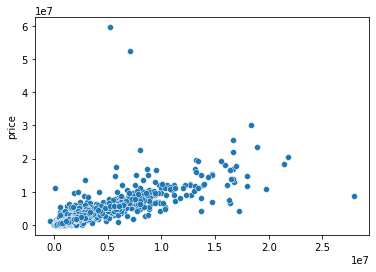

In [44]:
sns.scatterplot(x=xg_predict, y=y_test, )

In [40]:
model_2.predict(X_valid)

array([220941.75], dtype=float32)